In [3]:
import pickle
from sklearn.inspection import permutation_importance

# Load model
with open(r"data\CartPole-v0\max_episode1\42\policy.pkl", "rb") as f:
    model = pickle.load(f)

In [4]:
import pandas as pd
import pickle
from sklearn.inspection import permutation_importance


# Load dataset
data = pd.read_csv(r"data\CartPole-v0\max_episode1\42\training_data.csv")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Permutation importance (using full dataset here, or split into test set if you prefer)
result = permutation_importance(model.estimator, X, y, n_repeats=10, random_state=42)

# Create dataframe of importances
importance_df = pd.DataFrame({
    "feature": X.columns,
    "permutation_importance_mean": result.importances_mean,
    "permutation_importance_std": result.importances_std
}).sort_values(by="permutation_importance_mean", ascending=False)

print(importance_df)


# Access the underlying RandomForestClassifier
rf_model = model.estimator

# Built-in feature importances
importance_df = pd.DataFrame({
    "feature": X.columns,
    "built-in_importance": rf_model.feature_importances_
}).sort_values(by="built-in_importance", ascending=False)

print(importance_df)

e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but

           feature  permutation_importance_mean  permutation_importance_std
2          state_2                     0.016403                    0.004449
4   desired_return                     0.003762                    0.003465
5  desired_horizon                     0.003160                    0.004320
1          state_1                     0.000301                    0.006031
3          state_3                    -0.001204                    0.006740
0          state_0                    -0.007675                    0.006212
           feature  built-in_importance
2          state_2             0.205053
0          state_0             0.177965
1          state_1             0.171964
3          state_3             0.170145
5  desired_horizon             0.142540
4   desired_return             0.132332


e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but

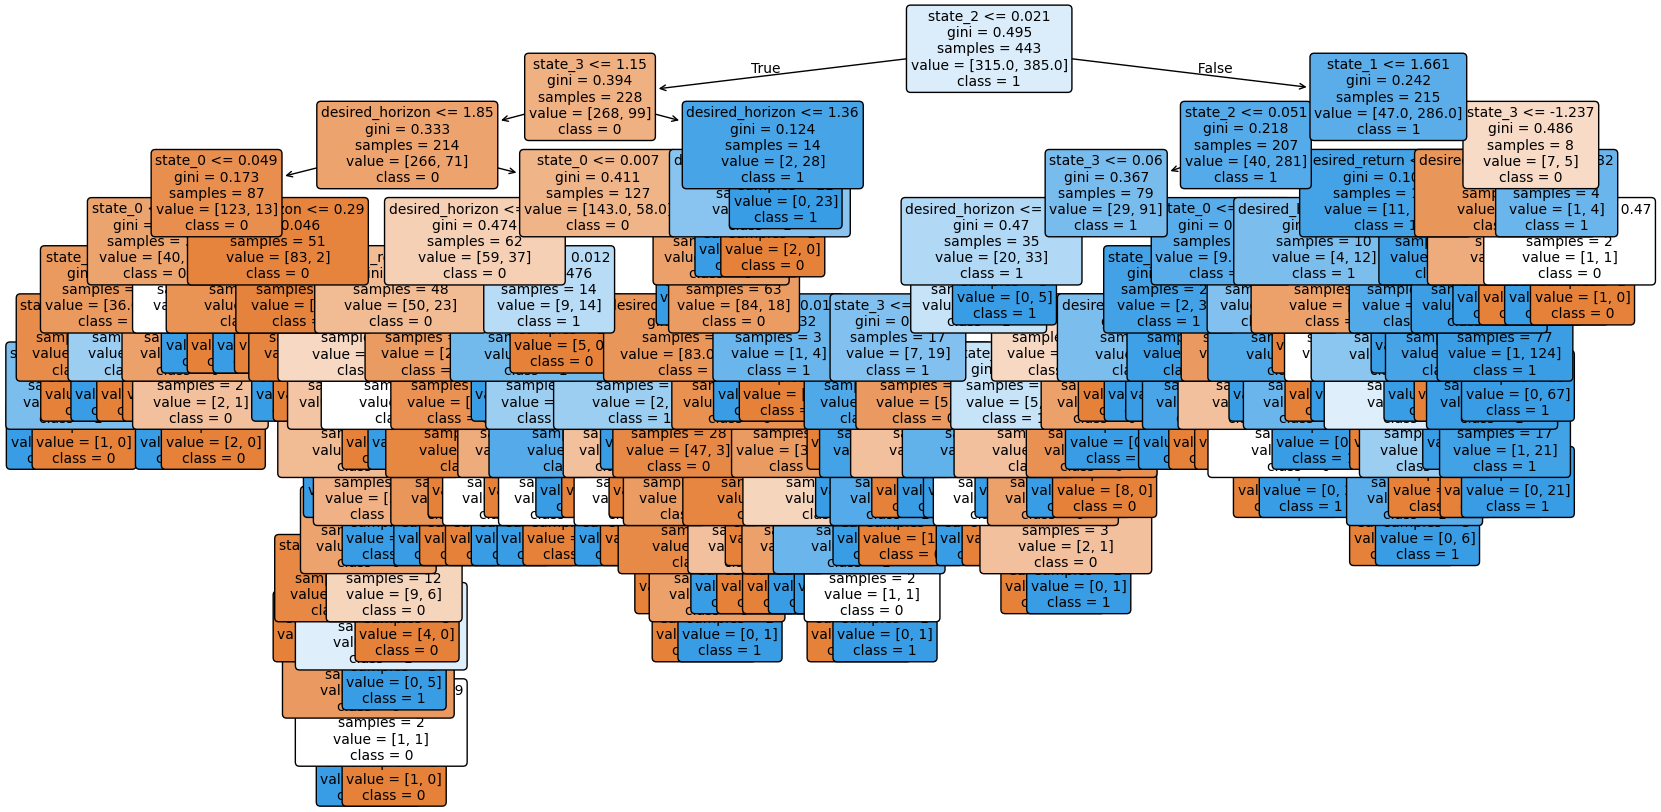

In [8]:
import pickle
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

# Load your policy (RandomForest wrapped inside SklearnPolicy)
with open(r"resources/CartPole-v0/RandomForest/policy.pkl", "rb") as f:
    policy = pickle.load(f)

# Access the underlying RandomForestClassifier
rf_model = policy.estimator

# Load dataset (for feature names)
data = pd.read_csv(r"data\CartPole-v0\estimator_nameensemble.GradientBoostingClassifier_max_episode5\42\training_data.csv")
X = data.iloc[:, :-1]

# Pick one tree from the forest (e.g., the first)
estimator = rf_model.estimators_[0]

# Plot the tree
plt.figure(figsize=(20,10))
tree.plot_tree(
    estimator, 
    feature_names=X.columns, 
    class_names=[str(c) for c in rf_model.classes_], 
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but

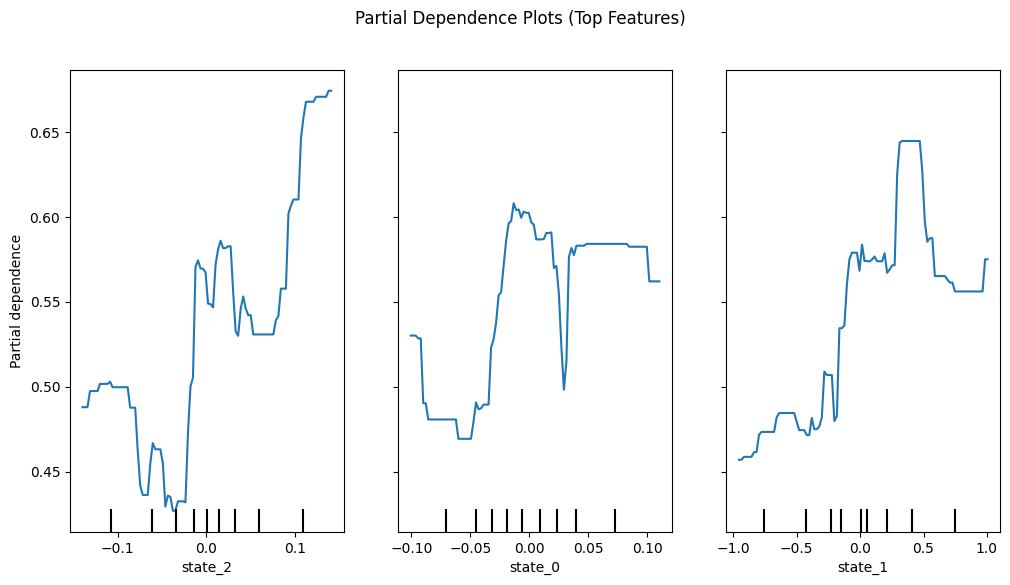

In [9]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Load your policy (RandomForest wrapped inside SklearnPolicy)
with open(r"data\CartPole-v0\estimator_nameensemble.GradientBoostingClassifier_max_episode5\42\policy.pkl", "rb") as f:
    policy = pickle.load(f)

# Access the underlying RandomForestClassifier
rf_model = policy.estimator


# Access the fitted RandomForestClassifier
rf_model = model.estimator  # as you already did

# Pick top features from permutation importance
top_features = importance_df["feature"].head(3).tolist()  # top 3 for example

# Plot PDPs
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(
    rf_model,
    X,
    features=top_features,
    target=1,  # for multiclass classification, specify the class index (0, 1, 2...)
    ax=ax
)
plt.suptitle("Partial Dependence Plots (Top Features)")
plt.show()


e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but

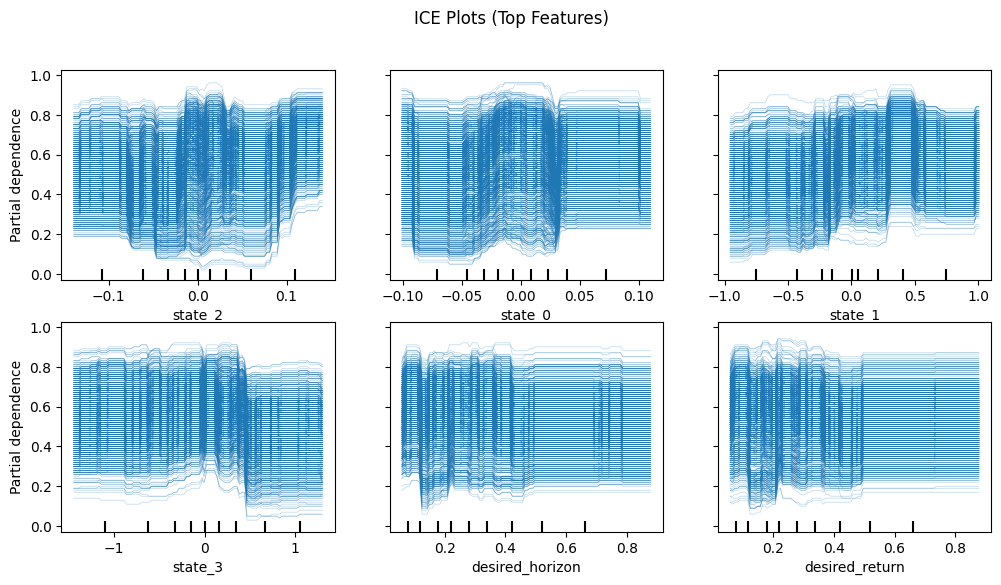

In [10]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Assuming you already have rf_model and X

# Top features (same as PDP)
top_features = importance_df["feature"].head(6).tolist()

# Plot ICE plots
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(
    rf_model,
    X,
    features=top_features,
    target=0,  # class index
    kind="individual",  # <-- ICE instead of PDP
    ax=ax
)
plt.suptitle("ICE Plots (Top Features)")
plt.show()
